## K-Nearest Neighbors (KNN)

In [54]:
# Import all required libraries
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from numpy import mean, std
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [55]:
# Import feature and target columns
X = pickle.load(open("./common/feature_status.p", "rb"))
y = pickle.load(open("./common/target_status.p", "rb"))

### Find the best n_neighbors for KNN 

In [56]:
X_test = pickle.load(open("./common/metrics_test.p", "rb"))
X_train = pickle.load(open("./common/metrics_train.p", "rb"))
y_test = pickle.load(open("./common/status_test.p", "rb"))
y_train = pickle.load(open("./common/status_train.p", "rb"))

In [57]:
# Define the parameter values that should be searched
k_range = list(range(1, 31))

In [58]:
# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)

In [59]:
# Instantiate the grid
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [60]:
# Fit the grid with data
grid.fit(X_train, y_train)

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: Data

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [61]:
# View the results
print("Best Score:", grid.best_score_)
print("Best Parameters:", grid.best_params_)

Best Score: 0.9548628847963435
Best Parameters: {'n_neighbors': 3}


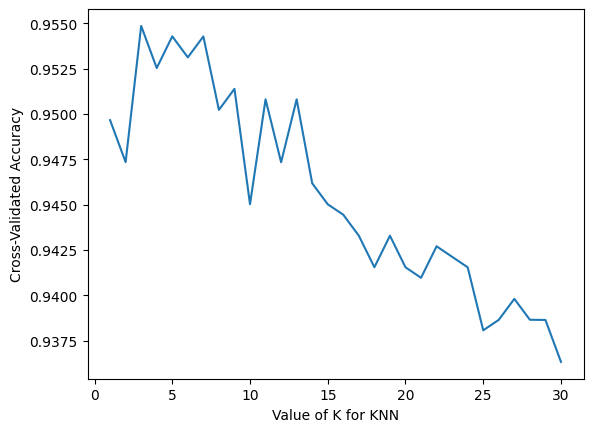

In [62]:
# Plot the results
grid_mean_scores = grid.cv_results_['mean_test_score']
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [63]:
# Get best n_neighbors
best_n_neighbors = grid.best_params_.get('n_neighbors')
best_n_neighbors

3

### Perform Cross Validation

In [64]:
# Define the model
clf_cv = KNeighborsClassifier(n_neighbors=5)

# Define metrics
scoring = ['precision_macro', 'recall_macro', 'f1_macro']
# scoring = { 'accuracy': make_scorer(accuracy_score),
#             'precision': make_scorer(precision_score),
#             'recall': make_scorer(recall_score),
#             'F1': make_scorer(f1_score) }


# Define the cross-validation procedure
cv = KFold(n_splits=10, shuffle=False)

In [65]:
# scores = cross_validate(clf_cv, X, y, cv=10, scoring=scoring)
scores = cross_validate(clf_cv, X, y, scoring=scoring, cv=cv, n_jobs=-1)

In [67]:
# Print scores
# for metric_name, score_array in scores.items():
#     if metric_name.startswith('test_'):
#         print(f'{metric_name}: {score_array.mean():.2f} (+/- {score_array.std() * 2:.2f})')
print('Precision: %.3f (%.3f)' % (mean(scores['test_precision_macro']), std(scores['test_precision_macro'])))
print('Recall: %.3f (%.3f)' % (mean(scores['test_recall_macro']), std(scores['test_recall_macro'])))
print('F1 score: %.3f (%.3f)' % (mean(scores['test_f1_macro']), std(scores['test_f1_macro'])))

Precision: 0.902 (0.089)
Recall: 0.869 (0.118)
F1 score: 0.882 (0.106)


### Train the model

In [50]:
# Create and train the model
# clf = KNeighborsClassifier()
clf = KNeighborsClassifier(n_neighbors=best_n_neighbors)
clf.fit(X_train, y_train)

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [51]:
# Use the model to make predictions on the test set
y_pred = clf.predict(X_test)

In [52]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))

Accuracy: 0.9745958429561201
Precision: 0.8709677419354839
Recall: 0.7941176470588235
F1: 0.8307692307692308


### Visualize the model

In [53]:
clf_matrix = confusion_matrix(y_test, y_pred)
clf_matrix

array([[395,   4],
       [  7,  27]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted Label')

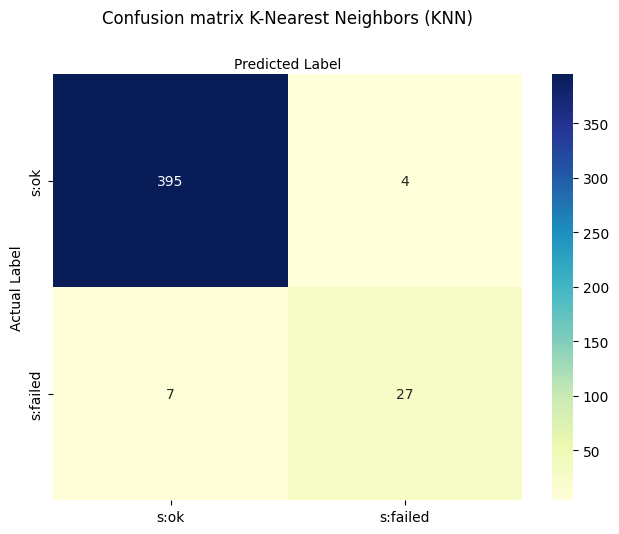

In [54]:
# Assuming clf_matrix is the confusion matrix you've computed
clf_matrix_df = pd.DataFrame(clf_matrix, index=["s:ok", "s:failed"], columns=["s:ok", "s:failed"])

# Create heatmap
class_names=["s:ok", "s:failed"]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))

plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(clf_matrix_df, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")

plt.tight_layout()
plt.title('Confusion matrix K-Nearest Neighbors (KNN)', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

### Export the model

In [55]:
pickle.dump(clf, open("./models/knn.p", "wb"))